<a href="https://colab.research.google.com/github/SophrosyneEunoia/Notes/blob/main/5%20-%20Deep%20Learning/Introduction%20to%20Neural%20Network%20Regression%20using%20TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

print(tf.__version__)

2.8.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.arange(3,27,3)

print(X)
print(y)

[-7. -4. -1.  2.  5.  8. 11. 14.]
[ 3  6  9 12 15 18 21 24]


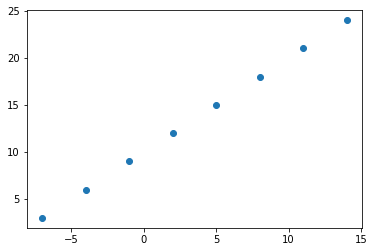

In [3]:
plt.scatter(X,y)
plt.show()

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### First Regression Model

In [5]:
# Create features (using tensors)
feature = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
labels = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

In [6]:
# Create a model using the Sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Model Fitting - Error For Development
try:
  model.fit(feature, labels, epochs=5)
except:
  print("Input 0 of layer 'dense' is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)")

Epoch 1/5
Input 0 of layer 'dense' is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)


In [7]:
X_exp = tf.expand_dims(feature, axis=-1)

print(feature.shape)
print(X_exp.shape)

(8,)
(8, 1)


In [8]:
# Create a model using the Sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Model Fitting - Error For Development
try:
  model.fit(X_exp, labels, epochs=5)
except:
  print("Input 0 of layer 'dense' is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)")

Epoch 1/5
1/1 [==============================] - 0s 448ms/step - loss: 12.6773 - mae: 12.6773
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 12.5448 - mae: 12.5448
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 12.4123 - mae: 12.4123
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 12.2798 - mae: 12.2798
Epoch 5/5
1/1 [==============================] - 0s 17ms/step - loss: 12.1473 - mae: 12.1473


In [9]:
model.predict([17.0]) # should be near at 27

array([[7.020983]], dtype=float32)

In [10]:
# Create a model using the Sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Model Fitting
model.fit(X_exp, labels, epochs=70)

Epoch 1/70
1/1 [==============================] - 1s 549ms/step - loss: 21.5503 - mae: 21.5503
Epoch 2/70
1/1 [==============================] - 0s 21ms/step - loss: 21.1572 - mae: 21.1572
Epoch 3/70
1/1 [==============================] - 0s 18ms/step - loss: 20.7641 - mae: 20.7641
Epoch 4/70
1/1 [==============================] - 0s 31ms/step - loss: 20.4067 - mae: 20.4067
Epoch 5/70
1/1 [==============================] - 0s 20ms/step - loss: 20.1254 - mae: 20.1254
Epoch 6/70
1/1 [==============================] - 0s 20ms/step - loss: 19.8442 - mae: 19.8442
Epoch 7/70
1/1 [==============================] - 0s 18ms/step - loss: 19.5629 - mae: 19.5629
Epoch 8/70
1/1 [==============================] - 0s 17ms/step - loss: 19.2817 - mae: 19.2817
Epoch 9/70
1/1 [==============================] - 0s 25ms/step - loss: 19.0004 - mae: 19.0004
Epoch 10/70
1/1 [==============================] - 0s 18ms/step - loss: 18.7192 - mae: 18.7192
Epoch 11/70
1/1 [==============================] - 0s 15ms

In [11]:
model.predict([17.0]) # should be near at 27

array([[21.915611]], dtype=float32)

### Second Model

In [12]:
import numpy as np

# y = x + 10
X = np.arange(-100, 100, 4)
y = np.arange(-90, 110, 4)

In [13]:
# first 40 examples (80% of data)
X_train = X[:40]
y_train = y[:40]

# last 10 examples (20% of data)
X_test = X[40:]
y_test = y[40:]

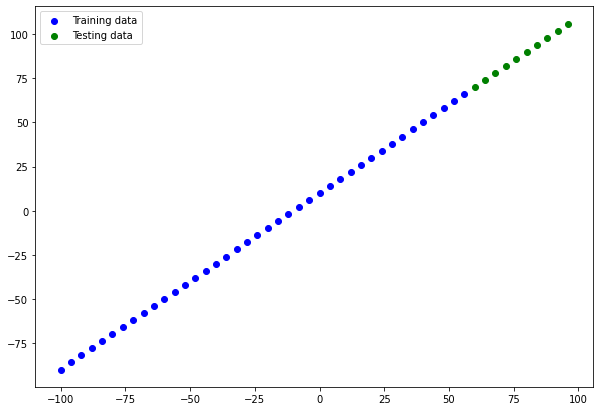

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [15]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

try:
  model.summary()
except:
  print("ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.")

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.


We also haven't told it what input shape it should be expecting.

Remember above, how we discussed the input shape was just one number?

We can let our model know the input shape of our data using the input_shape parameter to the first layer (usually if input_shape isn't defined, Keras tries to figure it out automatically).

In [16]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=[1]))

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model.summary()

# Param # -> Weight + Bias
# Weight is connection between n-1 layers * n layers
# In this case, we only have 1 and 1 layers, so -> 1 * 1 = 1
# The bias is from the n-node, we have 1 node, so, 1 bias
# 1 (Weight) + 1 (Bias) = 2

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.get_weights()

[array([[0.46663916]], dtype=float32), array([0.], dtype=float32)]

Calling summary() on our model shows us the layers it contains, the output shape and the number of parameters.

Total params - total number of parameters in the model.<br>
Trainable parameters - these are the parameters (patterns) the model can update as it trains.<br>
Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

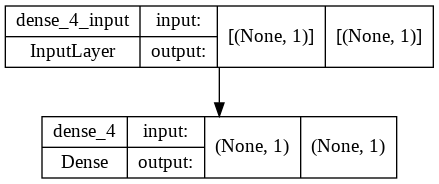

In [18]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [19]:
# Save a model
model.save('model_regresi')

INFO:tensorflow:Assets written to: model_regresi/assets


In [20]:
!ls model_regresi

assets	keras_metadata.pb  saved_model.pb  variables


In [21]:
# Load a model
loaded_model = tf.keras.models.load_model('model_regresi')